In [2]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("nasav3.csv")
df

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,7.890000e+11,22017.00380,13680.509940,6.275369e+07,5,0.025282,4.634,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,21.300,0.146068,0.326618,7.890000e+11,65210.34609,40519.173110,5.729815e+07,3,0.186935,5.457,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,20.300,0.231502,0.517654,7.900000e+11,27326.56018,16979.661800,7.622912e+06,0,0.043058,4.557,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,27.400,0.008801,0.019681,7.900000e+11,40225.94819,24994.839860,4.268362e+07,6,0.005512,5.093,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,21.600,0.127220,0.284472,7.900000e+11,35426.99179,22012.954980,6.101082e+07,1,0.034798,5.154,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,1.470000e+12,79755.35427,49556.875550,6.187511e+06,8,0.019777,5.156,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,0
4683,28.200,0.006089,0.013616,1.470000e+12,11610.53958,7214.337772,9.677324e+05,6,0.006451,5.742,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,1.470000e+12,25889.91063,16086.983630,9.126775e+06,6,0.059972,4.410,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,1.470000e+12,40867.52231,25393.489070,3.900908e+07,5,0.177510,4.477,...,21.080244,163.802909,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,0


In [4]:
df.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [5]:
df["Hazardous"]

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64

In [6]:
features = ['Absolute Magnitude', 'Est Dia in KM(max)',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(kilometers)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion']
print(features)


['Absolute Magnitude', 'Est Dia in KM(max)', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(kilometers)', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']


In [7]:
x = df[features]
y = df['Hazardous']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
X=scaler.transform(x)
X

array([[-0.23104209, -0.20941058, -1.07713904, ...,  0.45919054,
         0.77839321, -0.43110028],
       [-0.33482448, -0.15840557,  0.56814611, ...,  0.07081746,
        -0.06909298,  0.31258164],
       [-0.68076581,  0.07278876, -0.8748918 , ...,  0.41557982,
         1.03940428, -0.52211437],
       ...,
       [ 0.14949337, -0.34623784, -0.92961547, ...,  0.60624511,
         0.20776991, -0.63207867],
       [-0.16185382, -0.23970271, -0.35910064, ...,  0.59330298,
         0.2079915 , -0.56766111],
       [-1.09278193,  0.53049632,  3.01353553, ...,  0.6254237 ,
         0.03397983, -0.54733945]])

In [9]:
n_components = 2

 
# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
 
# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca1)

           PC1       PC2
0     0.035467 -0.877898
1    -0.661874  1.781214
2     0.335957 -0.998262
3    -1.107668 -1.784543
4    -0.763059 -0.068245
...        ...       ...
4682 -0.781252  0.627510
4683 -2.411124 -3.223169
4684  0.391110 -2.031184
4685  0.565106 -0.652516
4686  1.491336  4.106644

[4687 rows x 2 columns]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_pca1,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

## SVM

In [11]:
Sclf = SVC(kernel='poly')
Sclf = Sclf.fit(X_train, y_train)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
predicted = Sclf.predict(X_train)
print(accuracy_score(y_train,predicted))

0.8375533428165007


In [13]:
# For For support vector classifier
# Predict labels for test set
y_pred = Sclf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.8430034129692833
Confusion matrix:
[[988   0]
 [184   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       988
           1       0.00      0.00      0.00       184

    accuracy                           0.84      1172
   macro avg       0.42      0.50      0.46      1172
weighted avg       0.71      0.84      0.77      1172



C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

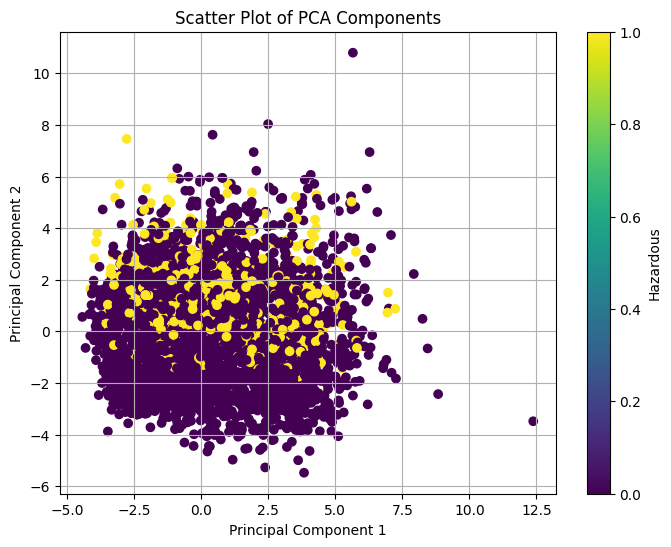

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_pca1['PC1'], df_pca1['PC2'], c=df['Hazardous'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components')
plt.colorbar(label='Hazardous')  # Adding colorbar for class labels
plt.grid(True)
plt.show()